### Objectives

- Random Variables

- Probability Mass Functions

- Distributions

- Cumulative Distribution Functions

- Some Important Distributions

    - Binomial
    - Normal



### Random Variables

Consider an experiment of drawing two cards from a deck of cards: Let's try to write the sample space for this event:

In [2]:
import itertools
import numpy as np
suits = ['diamonds', 'clubs', 'hearts', 'spades']

runs = ['A', '2', '3', '4', '5', '6', '7', '8', '9', '10', 'J', 'Q', 'K']

cards = list(itertools.product(suits, runs))

In [3]:
sample_space = list(itertools.combinations(cards,2))

Let's us define a function $X: S \to \mathbb{N}$ on this sample space such that when X(card1, card2) = card1 + card2. 

(J = 11, Q = 12, K=13, A = 1)

Let's write this function in code:


In [4]:
royal_num = {'A':1, 'J':11, 'Q':12, 'K':13}
def random_variable(two_cards):
    num1 = 0
    num2 = 0
    card1 = two_cards[0]
    card2 = two_cards[1]
    if card1[1] in royal_num.keys():
        num1 = royal_num[card1[1]]
    else:
        num1 = int(card1[1])
    if card2[1] in royal_num.keys():
        num2 = royal_num[card2[1]]
    else:
        num2 = int(card2[1])
    return num1 + num2
card_index = np.random.choice(range(1300),1)[0]
print(sample_space[card_index])
random_variable(sample_space[card_index])

(('clubs', 'Q'), ('hearts', '4'))


16

In [5]:
all_values = [random_variable(a) for a in sample_space ]

In [6]:
np.unique(all_values, return_counts=True)

(array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
        19, 20, 21, 22, 23, 24, 25, 26]),
 array([  6,  16,  22,  32,  38,  48,  54,  64,  70,  80,  86,  96, 102,
         96,  86,  80,  70,  64,  54,  48,  38,  32,  22,  16,   6]))

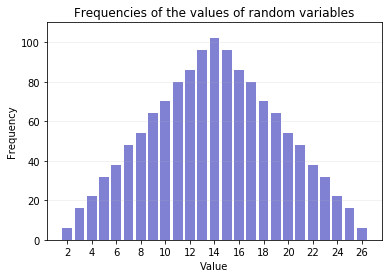

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
n, bins, patches = plt.hist(x=all_values, bins=range(2,28), color='#0504aa',
                            alpha=0.5, rwidth= 0.8,align = 'left' )
plt.grid(axis='y', alpha=0.2)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.xticks(range(2,28,2))
plt.title('Frequencies of the values of random variables')
maxfreq = n.max()
# Set a clean upper y-axis limit.
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)

plt.show()

#### Probability mass functions

Q: Can we find the probabilities corresponding to these values?

In [8]:
def mass_function(x):
    outcomes = []
    for i in sample_space:
        if random_variable(i) == x:
            outcomes.append(i)
    
    return len(outcomes)/len(sample_space)

In [9]:
l = [mass_function(k) for k in all_values ]

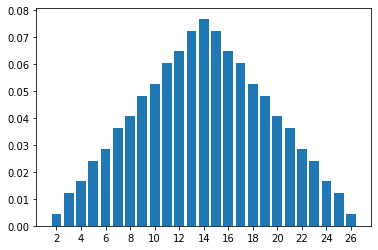

In [10]:
plt.bar(all_values,l)

plt.xticks(range(2,28,2))

plt.show()

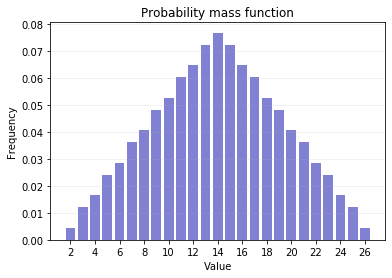

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
n, bins, patches = plt.hist(x=all_values, bins=range(2,28), color='#0504aa',
                            alpha=0.5, rwidth= 0.8,align = 'left' , density = True)
plt.grid(axis='y', alpha=0.2)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.xticks(range(2,28,2))
plt.title('Probability mass function')
maxfreq = n.max()
# Set a clean upper y-axis limit.
# plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)

plt.show()

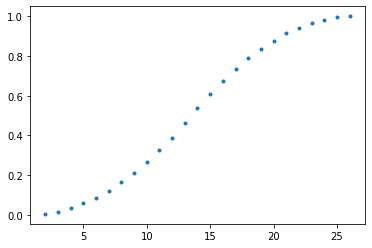

In [12]:
x = np.unique(all_values, return_counts=True)[0]
y = np.cumsum(np.unique(all_values, return_counts=True)[1])/len(all_values)
plt.plot(x,y, marker = '.',linestyle = 'none')
plt.show()